In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/Users/Satishkumarreddy/Desktop/SAT.csv', sep=' ', skipinitialspace=True)
df.head()

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [3]:
df.describe().T #summary statistics

,count,mean,std,min,25%,50%,75%,max
sat,50.0,947.9400,70.856397,790.00,889.2500,966.00,998.5000,1088.00
takers,50.0,26.2200,22.022521,2.00,6.2500,16.00,47.7500,69.00
income,50.0,293.9800,43.693034,208.00,261.5000,295.00,325.0000,401.00
years,50.0,16.2092,0.699982,14.39,15.9100,16.36,16.7575,17.41
public,50.0,81.2040,9.830917,44.80,76.9250,80.80,88.2500,97.00
expend,50.0,22.9656,6.144932,13.84,19.5925,21.61,26.3875,50.10
rank,50.0,79.9880,6.523072,69.80,74.0250,80.85,85.8250,90.60


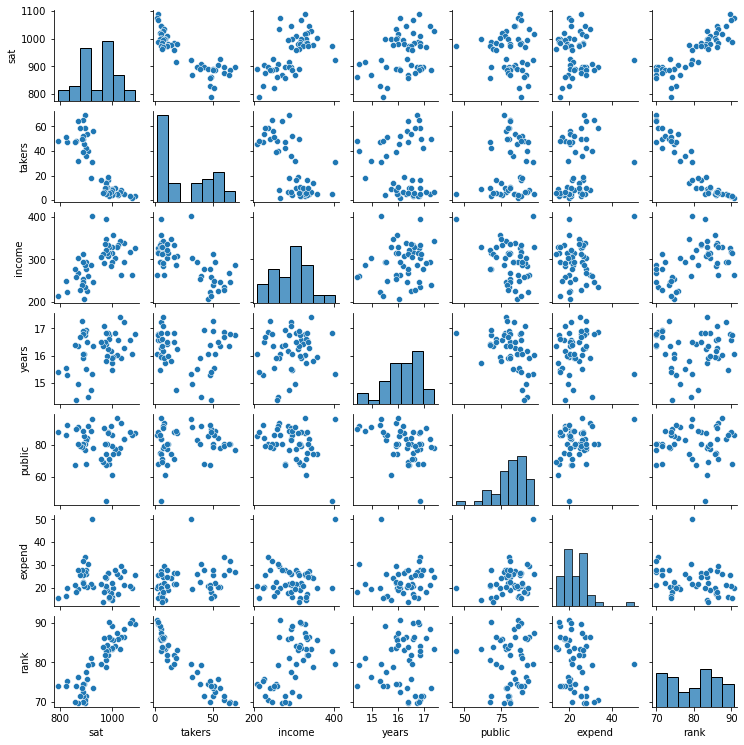

In [4]:
sns.pairplot(data=df, height=1.5)

In [5]:
y = df.iloc[:, 1].values.reshape(-1,1)

In [6]:
X1=sm.add_constant(df.iloc[:,2].values)
foo=pd.DataFrame(X1)
foo.head()

,0,1
0,1.0,3.0
1,1.0,2.0
2,1.0,3.0
3,1.0,5.0
4,1.0,5.0


In [7]:
X2=sm.add_constant(df.iloc[:, 2:].values)
foo=pd.DataFrame(X2)
foo.head()

,0,1,2,3,4,5,6
0,1.0,3.0,326.0,16.79,87.8,25.60,89.7
1,1.0,2.0,264.0,16.07,86.2,19.95,90.6
2,1.0,3.0,317.0,16.57,88.3,20.62,89.8
3,1.0,5.0,338.0,16.30,83.9,27.14,86.3
4,1.0,5.0,293.0,17.25,83.6,21.05,88.5


In [8]:
model1 = sm.OLS(y,X1).fit()
model1.summary(xname=['intercept','takers'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.77e-15
Time:                        01:33:17   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#variance of the model
model1.mse_resid

1353.8901619553137

In [10]:
#Full Regression Model

model2 = sm.OLS(y,X2).fit()
model2.summary(xname=['intercept','takers', 'income', 'years', 'public','expend','rank'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           4.16e-18
Time:                        01:33:17   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#variance of the model
model2.mse_resid

<h2> Filter Methods </h2>

In [11]:
X = df.drop({'state','sat'}, axis=1)

In [12]:
y = df['sat']

In [13]:
def filter_chi_squared(data, target, k=3):
    chi2_selector = SelectKBest(chi2, k=k)
    X_chi2 = chi2_selector.fit_transform(data, target)
    selected_features = data.columns[chi2_selector.get_support()]

    lr = LinearRegression().fit(X_chi2, target)
    y_pred_chi2 = lr.predict(X_chi2)
    r2_chi2 = r2_score(target, y_pred_chi2)

    return selected_features, r2_chi2

In [14]:
filter_chi_squared(X, y)

(Index(['takers', 'income', 'expend'], dtype='object'), 0.7759281497317616)

<b>Filter method (Chi-squared Test): This method selected 'takers', 'income', and 'expend' as the most important features, with an R^2 score of 0.776 (77.6%). This indicates that these features can explain 77.6% of the variance in the target variable.</b>

<h2> Warppper Methods </h2>

In [15]:
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [16]:
def wrapper_backward_elimination(data, target, significance_level=0.05):
    selected_features = backward_elimination(data, target, significance_level)
    X_backward = data[selected_features]

    lr = LinearRegression().fit(X_backward, target)
    y_pred_backward = lr.predict(X_backward)
    r2_backward = r2_score(target, y_pred_backward)

    return selected_features, r2_backward

In [17]:
import warnings
from warnings import simplefilter

# Ignore FutureWarning
simplefilter(action='ignore', category=FutureWarning)

In [18]:
wrapper_backward_elimination(X,y)

(['years', 'expend', 'rank'], 0.8711105337881823)

<b>Wrapper method (Backward Elimination): The method identified 'years', 'expend', and 'rank' as the most significant features and achieved an R^2 score of 0.871 (87.1%). This suggests that these features can explain 87.1% of the variance in the target variable.</b>

<h2> Embedded Method </h2>

In [19]:
def embedded_lasso(data, target, alpha=1.0):
    lasso = Lasso(alpha=alpha)
    lasso.fit(data, target)
    selected_features = data.columns[lasso.coef_ != 0]

    y_pred_lasso = lasso.predict(data[selected_features])
    r2_lasso = r2_score(target, y_pred_lasso)

    return selected_features, r2_lasso

In [20]:
embedded_lasso(X,y)

(Index(['takers', 'income', 'years', 'public', 'expend', 'rank'], dtype='object'),
 0.8781987462097269)

<b>Embedded method (Lasso Regression): The Lasso Regression model selected all the features ('takers', 'income', 'years', 'public', 'expend', and 'rank') and obtained an R^2 score of 0.878 (87.8%). This means that the model, using all the features, can explain 87.8% of the variance in the target variable.</b>

# Conclusion

If we prioritize model simplicity and interpretability, we may choose the Filter method, as it uses fewer features with a relatively good performance. However, if our goal is to achieve the highest possible prediction accuracy, we should consider the Embedded method (Lasso Regression), as it has the highest R^2 score.

<h2> Bonus Question (PCA) </h2>

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

pca_lr = LinearRegression().fit(X_pca, y)
y_pca_pred = pca_lr.predict(X_pca)

r2_pca = r2_score(y, y_pca_pred)

In [22]:
r2_pca

0.7364738543295741